In [13]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [14]:
nba = pd.read_csv('/Users/z2271499/Downloads/nba/regularSeason.csv')
nba

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,...,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
675,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,...,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
676,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,...,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
677,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,...,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5


In [15]:
nbaPPG_FG = nba.iloc[:, [1,2,10,29]]
nbaPPG_FG

,Player,Pos,FG%,PTS
0,Precious Achiuwa,C,0.485,9.2
1,Steven Adams,C,0.597,8.6
2,Bam Adebayo,C,0.540,20.4
3,Ochai Agbaji,SG,0.427,7.9
4,Santi Aldama,PF,0.470,9.0
...,...,...,...,...
674,Thaddeus Young,PF,0.545,4.4
675,Trae Young,PG,0.429,26.2
676,Omer Yurtseven,C,0.593,4.4
677,Cody Zeller,C,0.627,6.5


In [16]:
nbaPPG_FG.shape

(679, 4)

In [17]:
points = nbaPPG_FG['PTS'].to_numpy()
points

array([ 9.2,  8.6, 20.4,  7.9,  9. ,  6.2,  6.3,  5.9, 10.4, 14.3,  9. ,
        9.4, 31.1,  1.4, 13. , 16.8,  1.3,  0.3,  2.6,  9.2, 18. ,  3.5,
       12. ,  3.9, 23.3,  6.6,  7.3,  3.7, 20. , 21.5,  4.6,  3.9, 15. ,
       15.3, 19.6,  6.8,  7.7,  4.5,  5.7,  9.7,  6.1,  5.2,  5.4,  4. ,
       23.2, 12.7, 13.4, 11.1,  5.1,  4.6,  6.2,  6.4,  5.8, 13.8, 14.8,
       11.6,  2.2,  4.4,  3.3,  5.8,  4.3,  1.6, 14. , 21.6,  9.1,  0.4,
       27.8,  6.5,  9.4,  5.6,  3. ,  3.8,  0. ,  1.6, 10.2,  5.5,  4.7,
       20.1, 17.2, 26.1,  6.1, 14.9, 14.3, 11.5,  1.8, 26.6,  1.5,  4.3,
        4.6,  0. ,  0. ,  7.1, 24. ,  9.8, 12.1,  4.6,  7.2, 12.8,  0. ,
        6.2, 22.9,  2.4,  5.4, 10.8,  1.3,  5. , 12. ,  0.5,  8. , 15.2,
        4.3,  5.6,  9.7,  0. , 11. ,  2.2,  2. ,  2.5,  2.2,  3.1,  5.8,
       10. , 20.8, 12.6,  3.4, 13.1, 11.6,  7. , 11.9, 10.7, 14. ,  7.6,
        3.8,  6. ,  7.4,  6.9,  4.4, 19.9,  9.2, 29.4,  3.8, 25.9,  5.8,
        6.7,  1.6,  3.8,  5.2,  5.7,  3.5,  1.5, 24

In [18]:
Fg_percentage = nbaPPG_FG['FG%'].to_numpy()
Fg_percentage

array([0.485, 0.597, 0.54 , 0.427, 0.47 , 0.444, 0.488, 0.384, 0.44 ,
       0.644, 0.411, 0.509, 0.553, 0.435, 0.454, 0.476, 0.243, 0.2  ,
       0.25 , 0.437, 0.589, 0.819, 0.529, 0.394, 0.411, 0.485, 0.495,
       0.407, 0.427, 0.479, 0.423, 0.535, 0.473, 0.456, 0.434, 0.379,
       0.386, 0.354, 0.644, 0.508, 0.42 , 0.454, 0.449, 0.48 , 0.506,
       0.395, 0.396, 0.392, 0.395, 0.431, 0.4  , 0.402, 0.395, 0.422,
       0.404, 0.47 , 0.594, 0.552, 0.519, 0.575, 0.578, 0.185, 0.447,
       0.488, 0.546, 0.15 , 0.494, 0.418, 0.493, 0.358, 0.429, 0.462,
       0.   , 0.5  , 0.44 , 0.571, 0.495, 0.468, 0.463, 0.475, 0.386,
       0.484, 0.396, 0.483, 0.393, 0.491, 0.571, 0.635, 0.635, 0.   ,
       0.   , 0.43 , 0.491, 0.623, 0.654, 0.485, 0.409, 0.436, 0.   ,
       0.469, 0.539, 0.321, 0.561, 0.462, 0.231, 0.476, 0.653, 0.25 ,
       0.423, 0.525, 0.429, 0.455, 0.454, 0.   , 0.461, 0.333, 1.   ,
       0.167, 0.422, 0.415, 0.465, 0.656, 0.444, 0.705, 0.386, 0.508,
       0.518, 0.6  ,

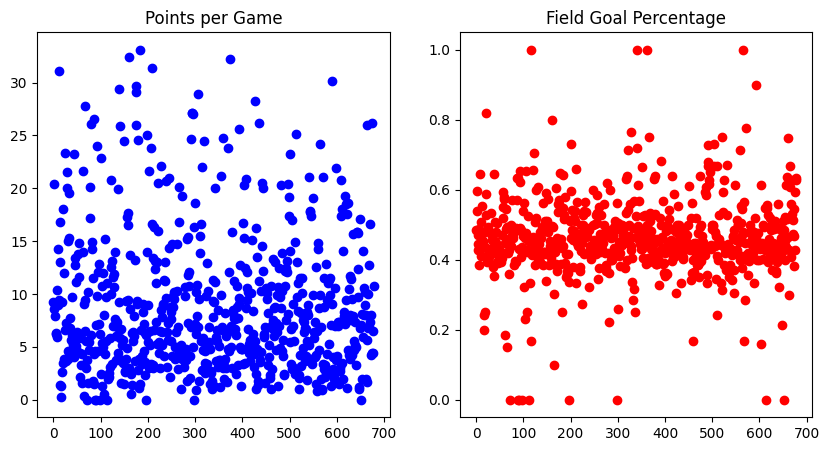

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title("Points per Game")
ax1.plot(points, 'o', color='blue')
ax2.set_title("Field Goal Percentage")
ax2.plot(Fg_percentage, 'o', color='red')

plt.show()

In [20]:
X = points.reshape(-1, 1)
y = Fg_percentage.reshape(-1, 1)

In [21]:
y_binary = (y > 0.4).astype(int)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/z2271499/Library/Python/3.11/lib/python/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [25]:
y_pred = logreg.predict(X_test)
threshold_line = np.array([0.4] * len(X_test))

Text(0.5, 1.0, 'Classification Model')

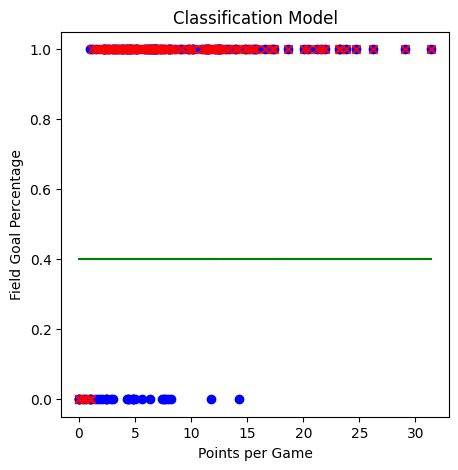

In [35]:
plt.figure(figsize=(5, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', marker='x', label='Predicted')
plt.plot(X_test, threshold_line, color='green', label='Threshold')
plt.xlabel('Points per Game')
plt.ylabel('Field Goal Percentage')
plt.title('Classification Model')


In [34]:
players_above_threshold = (y_test == 1).sum()
print("Number of players averaging over 25 points with a field goal percentage over 40%:", players_above_threshold)
players_under_threshold = (y_test == 0).sum()
print("Number of players averaging over 25 points with a field goal percentage under 40%:", players_under_threshold)

Number of players averaging over 25 points with a field goal percentage over 40%: 104
Number of players averaging over 25 points with a field goal percentage under 40%: 32


In [60]:
position_fg_percentage = nba.groupby('Pos')['FG%'].mean()
print("The average field goal percentage by position is:\n", position_fg_percentage)

The average field goal percentage by position is:
 Pos
C        0.550380
PF       0.476991
PF-SF    0.502333
PG       0.417837
SF       0.448928
SF-SG    0.529000
SG       0.428786
SG-PG    0.424000
Name: FG%, dtype: float64


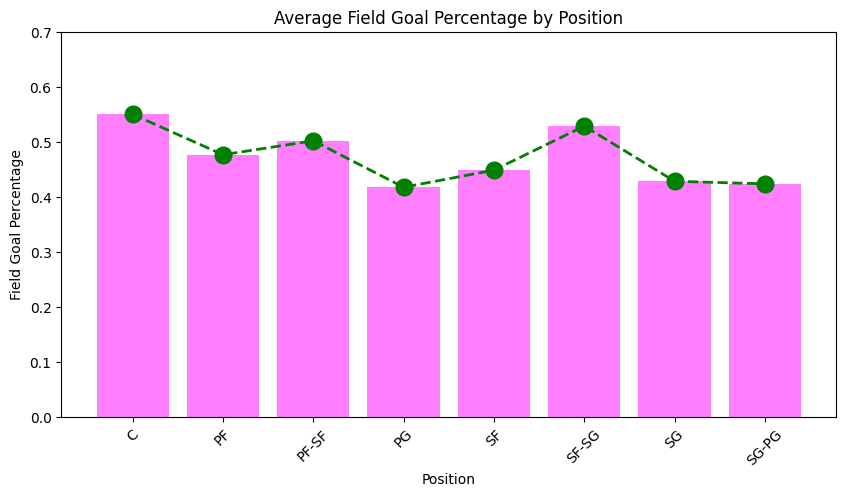

In [59]:
#create a bar chart to show the average field goal percentage by position
plt.figure(figsize=(10, 5))
plt.bar(position_fg_percentage.index, position_fg_percentage.values, color='magenta', alpha=0.5)
plt.xlabel('Position')
plt.ylabel('Field Goal Percentage')
plt.title('Average Field Goal Percentage by Position')
plt.xticks(rotation=45)
plt.ylim(0, 0.7)
plt.plot(position_fg_percentage.index, position_fg_percentage.values, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.show()
    

In [64]:
print("the position with the highest average field goal percentage are:", position_fg_percentage.idxmax(), "with an average field goal percentage of:", position_fg_percentage.max())
print("the position with the lowest average field goal percentage are:", position_fg_percentage.idxmin(), "with an average field goal percentage of:", position_fg_percentage.min())

the position with the highest average field goal percentage are: C with an average field goal percentage of: 0.5503798449612403
the position with the lowest average field goal percentage are: PG with an average field goal percentage of: 0.41783703703703706


In [66]:
# find the position with the highest average points per game
position_ppg = nba.groupby('Pos')['PTS'].mean()
print("The average points per game by position is:\n", position_ppg)

The average points per game by position is:
 Pos
C         7.944186
PF        8.840171
PF-SF    14.400000
PG        9.935556
SF        8.828800
SF-SG     9.800000
SG        8.636905
SG-PG     7.100000
Name: PTS, dtype: float64


In [67]:
print("the position with the highest average points per game are:", position_ppg.idxmax(), "with an average points per game of:", position_ppg.max())
print("the position with the lowest average points per game are:", position_ppg.idxmin(), "with an average points per game of:", position_ppg.min())

the position with the highest average points per game are: PF-SF with an average points per game of: 14.4
the position with the lowest average points per game are: SG-PG with an average points per game of: 7.1
